In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
#import missingno as msno
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline 


In [121]:
data = pd.read_csv(r"CommentsApril2017.csv")

C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [167]:
data.head(5).T

,0,1,2,3,4
approveDate,1491245186,1491188619,1491188617,1491167820,1491167815
commentBody,This project makes me happy to be a 30+ year T...,Stunning photos and reportage. Infuriating tha...,Brilliant work from conception to execution. I...,NYT reporters should provide a contributor's l...,Could only have been done in print. Stunning.
commentID,22022598.0,22017350.0,22017334.0,22015913.0,22015466.0
commentSequence,22022598,22017350,22017334,22015913,22015466
commentTitle,<br/>,NaN,<br/>,<br/>,<br/>
commentType,comment,comment,comment,comment,comment
createDate,1491237056.0,1491180489.0,1491179470.0,1491150196.0,1491147284.0
depth,1,1,1,1,1
editorsSelection,False,False,False,False,False
parentID,0.0,0.0,0.0,0.0,0.0


In [123]:
data.columns

Index(['approveDate', 'commentBody', 'commentID', 'commentSequence',
       'commentTitle', 'commentType', 'createDate', 'depth',
       'editorsSelection', 'parentID', 'parentUserDisplayName', 'permID',
       'picURL', 'recommendations', 'recommendedFlag', 'replyCount',
       'reportAbuseFlag', 'sharing', 'status', 'timespeople', 'trusted',
       'updateDate', 'userDisplayName', 'userID', 'userLocation', 'userTitle',
       'userURL', 'inReplyTo', 'articleID', 'sectionName', 'newDesk',
       'articleWordCount', 'printPage', 'typeOfMaterial'],
      dtype='object')

In [124]:
data.shape

(243832, 34)

In [125]:
data.describe

<bound method NDFrame.describe of         approveDate                                        commentBody  \
0        1491245186  This project makes me happy to be a 30+ year T...   
1        1491188619  Stunning photos and reportage. Infuriating tha...   
2        1491188617  Brilliant work from conception to execution. I...   
3        1491167820  NYT reporters should provide a contributor's l...   
4        1491167815     Could only have been done in print. Stunning.    
...             ...                                                ...   
243827   1493061963  Sorry, but pudding has nothing to do with it; ...   
243828   1493060948  While it would be quite punny to spell it "des...   
243829   1493087619       See above comments. "deserts" is the proper.   
243830   1493042801  John Rubinstein had two brief scenes with Joan...   
243831   1493042800  Ye gods and little fishes, Stu, you're right ....   

         commentID  commentSequence commentTitle commentType    createDate  \

In [126]:
final_data = data

In [127]:
data.head(5).T

,0,1,2,3,4
approveDate,1491245186,1491188619,1491188617,1491167820,1491167815
commentBody,This project makes me happy to be a 30+ year T...,Stunning photos and reportage. Infuriating tha...,Brilliant work from conception to execution. I...,NYT reporters should provide a contributor's l...,Could only have been done in print. Stunning.
commentID,22022598.0,22017350.0,22017334.0,22015913.0,22015466.0
commentSequence,22022598,22017350,22017334,22015913,22015466
commentTitle,<br/>,NaN,<br/>,<br/>,<br/>
commentType,comment,comment,comment,comment,comment
createDate,1491237056.0,1491180489.0,1491179470.0,1491150196.0,1491147284.0
depth,1,1,1,1,1
editorsSelection,False,False,False,False,False
parentID,0.0,0.0,0.0,0.0,0.0


In [128]:
final_data.shape

(243832, 34)

In [129]:
# Columns having missing values
missing_columns = [col for col in final_data.columns if final_data[col].isnull().sum() > 0]
missing_columns

['commentTitle',
 'parentUserDisplayName',
 'recommendedFlag',
 'reportAbuseFlag',
 'userDisplayName',
 'userLocation',
 'userTitle',
 'userURL']

In [130]:
def get_numerical_summary(final_data):
    total = final_data.shape[0]
    missing_columns = [col for col in final_data.columns if final_data[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = final_data[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [131]:
# Check the missing values with percentage 
missing_percent = get_numerical_summary(final_data)

commentTitle : 15334 (6.289%)
parentUserDisplayName : 173305 (71.076%)
recommendedFlag : 243832 (100.0%)
reportAbuseFlag : 243832 (100.0%)
userDisplayName : 76 (0.031%)
userLocation : 61 (0.025%)
userTitle : 243791 (99.983%)
userURL : 243827 (99.998%)


In [132]:
df_temp = final_data.copy()

In [133]:
# Threshold to remove attribute having missing values greater than threshold 
ATTRIBUTE_THRESHOLD = 80 #80% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True) 

In [134]:
df_temp

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,Rob Gayle,46006296,"Riverside, CA",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,NaN,comment,1.491180e+09,1,False,0.0,...,Susan A.,29202761,<br/>,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Meta,63944806,Raleigh NC,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,Tom Wyrick,1266184,"Missouri, USA",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,Joe Sharkey,61121360,"Tucson, Arizona",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243827,1493061963,"Sorry, but pudding has nothing to do with it; ...",22257227.0,22257227,<br/>,userReply,1.493059e+09,2,False,22255279.0,...,Neal,3123529,"New York, NY",22255279,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243828,1493060948,"While it would be quite punny to spell it ""des...",22257466.0,22257466,<br/>,userReply,1.493061e+09,2,False,22255279.0,...,Working Mama,1314074,New York City,22255279,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243829,1493087619,"See above comments. ""deserts"" is the proper.",22259265.0,22259265,<br/>,userReply,1.493076e+09,2,False,22253014.0,...,Greg Pitts,51967582,Boston,22253014,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243830,1493042801,John Rubinstein had two brief scenes with Joan...,22250099.0,22250099,<br/>,userReply,1.493019e+09,2,False,22249901.0,...,AT,197151,"New York, NY",22249901,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review


In [135]:
df_temp.shape

(243832, 30)

###  extract the categorical variables

In [136]:
cat_var = [ feature for feature in df_temp.columns if df_temp[feature].dtypes=='O']
len(cat_var)

13

In [137]:
cat_var

['commentBody',
 'commentTitle',
 'commentType',
 'parentUserDisplayName',
 'permID',
 'picURL',
 'status',
 'userDisplayName',
 'userLocation',
 'articleID',
 'sectionName',
 'newDesk',
 'typeOfMaterial']

In [138]:
df_temp[cat_var] = df_temp[cat_var].fillna('Nan') # fill null value with "Nan"

In [139]:
df_temp.isnull().sum()

approveDate              0
commentBody              0
commentID                0
commentSequence          0
commentTitle             0
commentType              0
createDate               0
depth                    0
editorsSelection         0
parentID                 0
parentUserDisplayName    0
permID                   0
picURL                   0
recommendations          0
replyCount               0
sharing                  0
status                   0
timespeople              0
trusted                  0
updateDate               0
userDisplayName          0
userID                   0
userLocation             0
inReplyTo                0
articleID                0
sectionName              0
newDesk                  0
articleWordCount         0
printPage                0
typeOfMaterial           0
dtype: int64

In [140]:
df_temp[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243832 entries, 0 to 243831
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   commentBody            243832 non-null  object
 1   commentTitle           243832 non-null  object
 2   commentType            243832 non-null  object
 3   parentUserDisplayName  243832 non-null  object
 4   permID                 243832 non-null  object
 5   picURL                 243832 non-null  object
 6   status                 243832 non-null  object
 7   userDisplayName        243832 non-null  object
 8   userLocation           243832 non-null  object
 9   articleID              243832 non-null  object
 10  sectionName            243832 non-null  object
 11  newDesk                243832 non-null  object
 12  typeOfMaterial         243832 non-null  object
dtypes: object(13)
memory usage: 24.2+ MB


### extract the Numerical variables

In [141]:
num_var = [feature for feature in df_temp.columns if df_temp[feature].dtypes != 'O']
len(num_var)

17

In [142]:
df_temp[num_var] = df_temp[num_var].fillna(0) # fill null value with 0

In [143]:
df_temp[num_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243832 entries, 0 to 243831
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   approveDate       243832 non-null  int64  
 1   commentID         243832 non-null  float64
 2   commentSequence   243832 non-null  int64  
 3   createDate        243832 non-null  float64
 4   depth             243832 non-null  int64  
 5   editorsSelection  243832 non-null  bool   
 6   parentID          243832 non-null  float64
 7   recommendations   243832 non-null  float64
 8   replyCount        243832 non-null  float64
 9   sharing           243832 non-null  int64  
 10  timespeople       243832 non-null  float64
 11  trusted           243832 non-null  float64
 12  updateDate        243832 non-null  int64  
 13  userID            243832 non-null  int64  
 14  inReplyTo         243832 non-null  int64  
 15  articleWordCount  243832 non-null  float64
 16  printPage         24

In [144]:
df_temp.isnull().sum()

approveDate              0
commentBody              0
commentID                0
commentSequence          0
commentTitle             0
commentType              0
createDate               0
depth                    0
editorsSelection         0
parentID                 0
parentUserDisplayName    0
permID                   0
picURL                   0
recommendations          0
replyCount               0
sharing                  0
status                   0
timespeople              0
trusted                  0
updateDate               0
userDisplayName          0
userID                   0
userLocation             0
inReplyTo                0
articleID                0
sectionName              0
newDesk                  0
articleWordCount         0
printPage                0
typeOfMaterial           0
dtype: int64

In [145]:
df_temp

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,Rob Gayle,46006296,"Riverside, CA",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,Nan,comment,1.491180e+09,1,False,0.0,...,Susan A.,29202761,<br/>,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Meta,63944806,Raleigh NC,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,Tom Wyrick,1266184,"Missouri, USA",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,Joe Sharkey,61121360,"Tucson, Arizona",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243827,1493061963,"Sorry, but pudding has nothing to do with it; ...",22257227.0,22257227,<br/>,userReply,1.493059e+09,2,False,22255279.0,...,Neal,3123529,"New York, NY",22255279,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243828,1493060948,"While it would be quite punny to spell it ""des...",22257466.0,22257466,<br/>,userReply,1.493061e+09,2,False,22255279.0,...,Working Mama,1314074,New York City,22255279,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243829,1493087619,"See above comments. ""deserts"" is the proper.",22259265.0,22259265,<br/>,userReply,1.493076e+09,2,False,22253014.0,...,Greg Pitts,51967582,Boston,22253014,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243830,1493042801,John Rubinstein had two brief scenes with Joan...,22250099.0,22250099,<br/>,userReply,1.493019e+09,2,False,22249901.0,...,AT,197151,"New York, NY",22249901,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review


In [146]:
df_final = df_temp.copy()

In [147]:
df_final

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,parentID,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,This project makes me happy to be a 30+ year T...,22022598.0,22022598,<br/>,comment,1.491237e+09,1,False,0.0,...,Rob Gayle,46006296,"Riverside, CA",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
1,1491188619,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350,Nan,comment,1.491180e+09,1,False,0.0,...,Susan A.,29202761,<br/>,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
2,1491188617,Brilliant work from conception to execution. I...,22017334.0,22017334,<br/>,comment,1.491179e+09,1,False,0.0,...,Meta,63944806,Raleigh NC,0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
3,1491167820,NYT reporters should provide a contributor's l...,22015913.0,22015913,<br/>,comment,1.491150e+09,1,False,0.0,...,Tom Wyrick,1266184,"Missouri, USA",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
4,1491167815,Could only have been done in print. Stunning.,22015466.0,22015466,<br/>,comment,1.491147e+09,1,False,0.0,...,Joe Sharkey,61121360,"Tucson, Arizona",0,58def1347c459f24986d7c80,Unknown,Insider,716.0,2,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243827,1493061963,"Sorry, but pudding has nothing to do with it; ...",22257227.0,22257227,<br/>,userReply,1.493059e+09,2,False,22255279.0,...,Neal,3123529,"New York, NY",22255279,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243828,1493060948,"While it would be quite punny to spell it ""des...",22257466.0,22257466,<br/>,userReply,1.493061e+09,2,False,22255279.0,...,Working Mama,1314074,New York City,22255279,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243829,1493087619,"See above comments. ""deserts"" is the proper.",22259265.0,22259265,<br/>,userReply,1.493076e+09,2,False,22253014.0,...,Greg Pitts,51967582,Boston,22253014,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review
243830,1493042801,John Rubinstein had two brief scenes with Joan...,22250099.0,22250099,<br/>,userReply,1.493019e+09,2,False,22249901.0,...,AT,197151,"New York, NY",22249901,58fd5c3d7c459f24986dbac5,Unknown,Culture,981.0,2,Review


- Use LabelEncoder to convert Categorical Data in to numerical form

In [154]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_cols = [col for col in df_final.columns if df_final[col].dtype == "object"]

for col in cat_cols:
    df_final[col] = lb.fit_transform(df_temp[col])
    
    


In [179]:
df_final.drop("editorsSelection", axis=1, inplace=True)
df_final.head(50)

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,parentID,parentUserDisplayName,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,197304,22022598.0,22022598,0,0,1.491237e+09,1,0.0,8670,...,30673,46006296,10135,0,0,30,9,716.0,2,4
1,1491188619,162905,22017350.0,22017350,1,0,1.491180e+09,1,0.0,8670,...,34286,29202761,239,0,0,30,9,716.0,2,4
2,1491188617,36976,22017334.0,22017334,0,0,1.491179e+09,1,0.0,8670,...,24783,63944806,9881,0,0,30,9,716.0,2,4
3,1491167820,129728,22015913.0,22015913,0,0,1.491150e+09,1,0.0,8670,...,35924,1266184,7373,0,0,30,9,716.0,2,4
4,1491167815,43153,22015466.0,22015466,0,0,1.491147e+09,1,0.0,8670,...,17771,61121360,12305,0,0,30,9,716.0,2,4
5,1491142576,165179,22012085.0,22012085,0,0,1.491129e+09,1,0.0,8670,...,40122,59125002,14896,0,0,30,9,716.0,2,4
6,1491060909,147121,22003784.0,22003784,0,0,1.491056e+09,1,0.0,8670,...,4297,320791,3415,0,0,30,9,716.0,2,4
7,1491252241,171450,22024897.0,22024897,0,2,1.491248e+09,2,22015913.0,11946,...,1341,65289571,11883,22015913,0,30,9,716.0,2,4
8,1491668599,71316,22082978.0,22082978,1,2,1.491665e+09,2,22015913.0,11946,...,19881,76442479,564,22015913,0,30,9,716.0,2,4
9,1491064414,67872,22004930.0,22004930,0,0,1.491061e+09,1,0.0,8670,...,12671,59237391,1963,0,1,30,16,823.0,23,7


In [180]:
df_final.tail(38)

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,parentID,parentUserDisplayName,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
243794,1493042805,53888,22252878.0,22252878,0,0,1.493042e+09,1,0.0,8670,...,29651,54448328,1690,0,639,30,3,1052.0,1,9
243795,1493042799,36604,22252525.0,22252525,0,0,1.493040e+09,1,0.0,8670,...,12699,20779570,8144,0,639,30,3,1052.0,1,9
243796,1493042799,161190,22249838.0,22249838,1,0,1.493006e+09,1,0.0,8670,...,35281,63651083,8144,0,639,30,3,1052.0,1,9
243797,1493391145,161218,22290237.0,22290237,0,2,1.493321e+09,2,22289357.0,1529,...,9545,76798887,14896,22289357,639,30,3,1052.0,1,9
243798,1494856803,165312,22499128.0,22499128,0,2,1.494824e+09,2,22260745.0,8163,...,4629,3775954,8099,22260745,639,30,3,1052.0,1,9
243799,1495317322,168231,22562764.0,22562764,0,2,1.495213e+09,2,22260745.0,8163,...,24932,67638682,6800,22260745,639,30,3,1052.0,1,9
243800,1506710125,47078,24254934.0,24254934,0,2,1.506708e+09,2,22260745.0,8163,...,10776,22665442,10559,22260745,639,30,3,1052.0,1,9
243801,1493507016,167068,22303698.0,22303698,0,2,1.493409e+09,2,22258482.0,302,...,9545,76798887,14896,22258482,639,30,3,1052.0,1,9
243802,1494513031,103237,22450110.0,22450110,0,2,1.494455e+09,2,22258482.0,302,...,24498,56299509,1722,22258482,639,30,3,1052.0,1,9
243803,1494513031,172305,22450132.0,22450132,0,2,1.494455e+09,2,22258482.0,302,...,24498,56299509,1722,22258482,639,30,3,1052.0,1,9


In [181]:
df_final = df_final.drop(df_final.index[441545:])

In [182]:
df_final

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,parentID,parentUserDisplayName,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,197304,22022598.0,22022598,0,0,1.491237e+09,1,0.0,8670,...,30673,46006296,10135,0,0,30,9,716.0,2,4
1,1491188619,162905,22017350.0,22017350,1,0,1.491180e+09,1,0.0,8670,...,34286,29202761,239,0,0,30,9,716.0,2,4
2,1491188617,36976,22017334.0,22017334,0,0,1.491179e+09,1,0.0,8670,...,24783,63944806,9881,0,0,30,9,716.0,2,4
3,1491167820,129728,22015913.0,22015913,0,0,1.491150e+09,1,0.0,8670,...,35924,1266184,7373,0,0,30,9,716.0,2,4
4,1491167815,43153,22015466.0,22015466,0,0,1.491147e+09,1,0.0,8670,...,17771,61121360,12305,0,0,30,9,716.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243827,1493061963,160999,22257227.0,22257227,0,2,1.493059e+09,2,22255279.0,6891,...,26525,3123529,8174,22255279,640,30,3,981.0,2,9
243828,1493060948,223493,22257466.0,22257466,0,2,1.493061e+09,2,22255279.0,6891,...,37664,1314074,8151,22255279,640,30,3,981.0,2,9
243829,1493087619,153578,22259265.0,22259265,0,2,1.493076e+09,2,22253014.0,5959,...,13433,51967582,1498,22253014,640,30,3,981.0,2,9
243830,1493042801,114369,22250099.0,22250099,0,2,1.493019e+09,2,22249901.0,15357,...,553,197151,8174,22249901,640,30,3,981.0,2,9


In [183]:
df_final.tail(30)

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,parentID,parentUserDisplayName,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
243802,1494513031,103237,22450110.0,22450110,0,2,1.494455e+09,2,22258482.0,302,...,24498,56299509,1722,22258482,639,30,3,1052.0,1,9
243803,1494513031,172305,22450132.0,22450132,0,2,1.494455e+09,2,22258482.0,302,...,24498,56299509,1722,22258482,639,30,3,1052.0,1,9
243804,1493138581,161220,22264995.0,22264995,0,2,1.493136e+09,2,22252878.0,9814,...,9545,76798887,14896,22252878,639,30,3,1052.0,1,9
243805,1493062019,10180,22256584.0,22256584,0,2,1.493055e+09,2,22252525.0,4224,...,41197,30702466,8174,22252525,639,30,3,1052.0,1,9
243806,1493092280,233677,22260753.0,22260753,0,2,1.493090e+09,2,22249838.0,11733,...,24932,67638682,6800,22249838,639,30,3,1052.0,1,9
243807,1494513031,136887,22450154.0,22450154,0,2,1.494455e+09,2,22249838.0,11733,...,24498,56299509,1722,22249838,639,30,3,1052.0,1,9
243808,1502930510,78871,23699683.0,23699683,0,0,1.502720e+09,1,0.0,8670,...,23622,78436923,12836,0,640,30,3,981.0,2,9
243809,1494985687,197474,22525703.0,22525703,0,0,1.494970e+09,1,0.0,8670,...,20809,63561928,6800,0,640,30,3,981.0,2,9
243810,1494424391,195115,22419738.0,22419738,0,0,1.494308e+09,1,0.0,8670,...,6103,80136336,1052,0,640,30,3,981.0,2,9
243811,1493163535,85135,22266345.0,22266345,0,0,1.493143e+09,1,0.0,8670,...,20906,1339010,7845,0,640,30,3,981.0,2,9


In [184]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243832 entries, 0 to 243831
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   approveDate            243832 non-null  int64  
 1   commentBody            243832 non-null  int32  
 2   commentID              243832 non-null  float64
 3   commentSequence        243832 non-null  int64  
 4   commentTitle           243832 non-null  int32  
 5   commentType            243832 non-null  int32  
 6   createDate             243832 non-null  float64
 7   depth                  243832 non-null  int64  
 8   parentID               243832 non-null  float64
 9   parentUserDisplayName  243832 non-null  int32  
 10  permID                 243832 non-null  int32  
 11  picURL                 243832 non-null  int32  
 12  recommendations        243832 non-null  float64
 13  replyCount             243832 non-null  float64
 14  sharing                243832 non-nu

In [185]:
df_final.isnull().sum()

approveDate              0
commentBody              0
commentID                0
commentSequence          0
commentTitle             0
commentType              0
createDate               0
depth                    0
parentID                 0
parentUserDisplayName    0
permID                   0
picURL                   0
recommendations          0
replyCount               0
sharing                  0
status                   0
timespeople              0
trusted                  0
updateDate               0
userDisplayName          0
userID                   0
userLocation             0
inReplyTo                0
articleID                0
sectionName              0
newDesk                  0
articleWordCount         0
printPage                0
typeOfMaterial           0
dtype: int64

In [186]:
df_final.select_dtypes('float')

,commentID,createDate,parentID,recommendations,replyCount,timespeople,trusted,articleWordCount
0,22022598.0,1.491237e+09,0.0,2.0,0.0,1.0,0.0,716.0
1,22017350.0,1.491180e+09,0.0,1.0,0.0,1.0,0.0,716.0
2,22017334.0,1.491179e+09,0.0,3.0,0.0,1.0,0.0,716.0
3,22015913.0,1.491150e+09,0.0,7.0,2.0,1.0,0.0,716.0
4,22015466.0,1.491147e+09,0.0,5.0,0.0,1.0,0.0,716.0
...,...,...,...,...,...,...,...,...
243827,22257227.0,1.493059e+09,22255279.0,8.0,0.0,1.0,0.0,981.0
243828,22257466.0,1.493061e+09,22255279.0,10.0,0.0,1.0,1.0,981.0
243829,22259265.0,1.493076e+09,22253014.0,2.0,0.0,1.0,0.0,981.0
243830,22250099.0,1.493019e+09,22249901.0,12.0,0.0,1.0,0.0,981.0


In [187]:
df_final.select_dtypes(exclude='float')

,approveDate,commentBody,commentSequence,commentTitle,commentType,depth,parentUserDisplayName,permID,picURL,sharing,...,updateDate,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,printPage,typeOfMaterial
0,1491245186,197304,22022598,0,0,1,8670,11368,181,0,...,1491245186,30673,46006296,10135,0,0,30,9,2,4
1,1491188619,162905,22017350,1,0,1,8670,7306,181,0,...,1491188619,34286,29202761,239,0,0,30,9,2,4
2,1491188617,36976,22017334,0,0,1,8670,7301,181,0,...,1491188617,24783,63944806,9881,0,0,30,9,2,4
3,1491167820,129728,22015913,0,0,1,8670,6844,181,0,...,1491167820,35924,1266184,7373,0,0,30,9,2,4
4,1491167815,43153,22015466,0,0,1,8670,6688,134,0,...,1491167815,17771,61121360,12305,0,0,30,9,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243827,1493061963,160999,22257227,0,2,2,6891,180354,181,0,...,1493061963,26525,3123529,8174,22255279,640,30,3,2,9
243828,1493060948,223493,22257466,0,2,2,6891,180355,181,0,...,1493060950,37664,1314074,8151,22255279,640,30,3,2,9
243829,1493087619,153578,22259265,0,2,2,5959,178652,181,0,...,1493087619,13433,51967582,1498,22253014,640,30,3,2,9
243830,1493042801,114369,22250099,0,2,2,15357,175859,181,0,...,1493042801,553,197151,8174,22249901,640,30,3,2,9


In [188]:
df_final[["recommendations"]] # check target column

,recommendations
0,2.0
1,1.0
2,3.0
3,7.0
4,5.0
...,...
243827,8.0
243828,10.0
243829,2.0
243830,12.0


In [189]:
# Create X & y values
X = df_final.drop("recommendations", axis=1)
y = df_final['recommendations']

In [190]:
y

0          2.0
1          1.0
2          3.0
3          7.0
4          5.0
          ... 
243827     8.0
243828    10.0
243829     2.0
243830    12.0
243831     7.0
Name: recommendations, Length: 243832, dtype: float64

In [191]:
# View features
X.head(10)

,approveDate,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,parentID,parentUserDisplayName,...,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,1491245186,197304,22022598.0,22022598,0,0,1.491237e+09,1,0.0,8670,...,30673,46006296,10135,0,0,30,9,716.0,2,4
1,1491188619,162905,22017350.0,22017350,1,0,1.491180e+09,1,0.0,8670,...,34286,29202761,239,0,0,30,9,716.0,2,4
2,1491188617,36976,22017334.0,22017334,0,0,1.491179e+09,1,0.0,8670,...,24783,63944806,9881,0,0,30,9,716.0,2,4
3,1491167820,129728,22015913.0,22015913,0,0,1.491150e+09,1,0.0,8670,...,35924,1266184,7373,0,0,30,9,716.0,2,4
4,1491167815,43153,22015466.0,22015466,0,0,1.491147e+09,1,0.0,8670,...,17771,61121360,12305,0,0,30,9,716.0,2,4
5,1491142576,165179,22012085.0,22012085,0,0,1.491129e+09,1,0.0,8670,...,40122,59125002,14896,0,0,30,9,716.0,2,4
6,1491060909,147121,22003784.0,22003784,0,0,1.491056e+09,1,0.0,8670,...,4297,320791,3415,0,0,30,9,716.0,2,4
7,1491252241,171450,22024897.0,22024897,0,2,1.491248e+09,2,22015913.0,11946,...,1341,65289571,11883,22015913,0,30,9,716.0,2,4
8,1491668599,71316,22082978.0,22082978,1,2,1.491665e+09,2,22015913.0,11946,...,19881,76442479,564,22015913,0,30,9,716.0,2,4
9,1491064414,67872,22004930.0,22004930,0,0,1.491061e+09,1,0.0,8670,...,12671,59237391,1963,0,1,30,16,823.0,23,7


In [192]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [193]:
y_test

225820     0.0
203149     9.0
73959      0.0
197129     5.0
238914     4.0
          ... 
75833      0.0
224939     2.0
229413    15.0
120207     5.0
176426     4.0
Name: recommendations, Length: 48767, dtype: float64

In [212]:
# Set random seed
#tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  #tf.keras.layers.Dense(128),
  #tf.keras.layers.Dense(64), 
  #tf.keras.layers.Dense(32),
  #tf.keras.layers.Dense(16),
  #tf.keras.layers.Dense(8),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = model_2.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
6096/6096 [==============================] - 17s 3ms/step - loss: 6475735.0000 - mae: 6475735.0000
Epoch 2/30
6096/6096 [==============================] - 17s 3ms/step - loss: 131764.5312 - mae: 131764.5312
Epoch 3/30
6096/6096 [==============================] - 17s 3ms/step - loss: 71947.6328 - mae: 71947.6328
Epoch 4/30
6096/6096 [==============================] - 17s 3ms/step - loss: 113479.4922 - mae: 113479.4922
Epoch 5/30
6096/6096 [==============================] - 17s 3ms/step - loss: 110869.1094 - mae: 110869.1094
Epoch 6/30
6096/6096 [==============================] - 17s 3ms/step - loss: 194833.6094 - mae: 194833.6094
Epoch 7/30
6096/6096 [==============================] - 17s 3ms/step - loss: 41455.4414 - mae: 41455.4414
Epoch 8/30
6096/6096 [==============================] - 17s 3ms/step - loss: 101407.4297 - mae: 101407.4297
Epoch 9/30
6096/6096 [==============================] - 17s 3ms/step - loss: 135089.9531 - mae: 135089.9531
Epoch 10/30
6096/6096 [=======

In [213]:
history_1 = model_2.fit(X_test, y_test, epochs=30, verbose=1)

Epoch 1/30
1524/1524 [==============================] - 4s 3ms/step - loss: 16.8178 - mae: 16.8178
Epoch 2/30
1524/1524 [==============================] - 4s 3ms/step - loss: 16.2949 - mae: 16.2949
Epoch 3/30
1524/1524 [==============================] - 4s 3ms/step - loss: 54.5900 - mae: 54.5900
Epoch 4/30
1524/1524 [==============================] - 4s 3ms/step - loss: 16.3302 - mae: 16.3302
Epoch 5/30
1524/1524 [==============================] - 4s 3ms/step - loss: 267.0170 - mae: 267.0170
Epoch 6/30
1524/1524 [==============================] - 4s 3ms/step - loss: 17.4011 - mae: 17.4011
Epoch 7/30
1524/1524 [==============================] - 4s 3ms/step - loss: 16.3468 - mae: 16.3468
Epoch 8/30
1524/1524 [==============================] - 4s 3ms/step - loss: 7079.7534 - mae: 7079.7534
Epoch 9/30
1524/1524 [==============================] - 4s 3ms/step - loss: 16.5083 - mae: 16.5083
Epoch 10/30
1524/1524 [==============================] - 4s 3ms/step - loss: 16.2012 - mae: 16.2012
Epo

In [214]:
# Evaluate our larger model
model_2.evaluate(X_test, y_test)

1524/1524 [==============================] - 3s 2ms/step - loss: 17.2162 - mae: 17.2162


[17.216188430786133, 17.216188430786133]

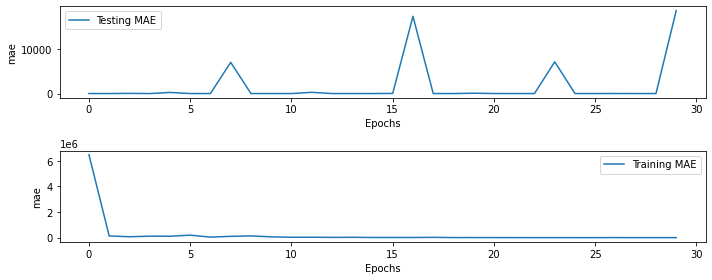

In [215]:
model_history_1 = pd.DataFrame(history_1.history)
model_history_2 = pd.DataFrame(history.history)
model_history_1['epoch'] = history_1.epoch

fig, ax = plt.subplots(2,1, figsize=(10,4))
num_epochs_1 = model_history_1.shape[0]
num_epochs_2 = model_history_2.shape[0]

ax[0].plot(np.arange(0, num_epochs_1), model_history_1["mae"], 
        label="Testing MAE")
ax[1].plot(np.arange(0, num_epochs_2), model_history_2["mae"], 
        label="Training MAE")
ax[0].set_ylabel('mae')
ax[0].set_xlabel('Epochs')
ax[1].set_ylabel('mae')
ax[1].set_xlabel('Epochs')
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [216]:
# define plot loss curves

def plot_loss_curves(history): # Plot Loss and Accuracy Curves 
  loss = history.history['loss']
  #val_loss = history.history['val_loss']
  mae = history.history['mae']
  #val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='loss')
  #plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, mae, label='mae')
  #plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('mae')
  plt.xlabel('Epochs')
  plt.legend();

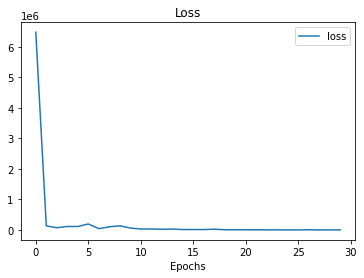

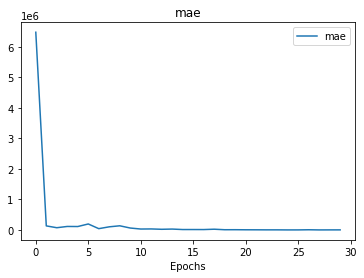

In [217]:
plot_loss_curves(history)

In [218]:
Preds = model_2.predict(X_test)
Preds = Preds.flatten()
Preds[:]

array([ 2.0211644,  4.1581807,  5.9158177, ...,  3.795281 , -4.5070033,
        2.1457448], dtype=float32)

In [219]:
PredsLabels = []
for element in Preds:
    PredsLabels.append(int(round(element)))
PredsLabelsA = np.array(PredsLabels)

In [220]:
test = []
for element in y_test:
    test.append(int(round(element)))
testA = np.array(test)

In [221]:
print(PredsLabelsA[:10])
print(testA[:10])

[ 2  4  6  3  2  2 -3 -4  3 -5]
[0 9 0 5 4 6 5 0 2 4]


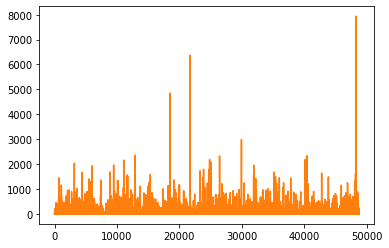

In [222]:
fig, ax = plt.subplots()
ax.plot(PredsLabelsA)
ax.plot(testA)

C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

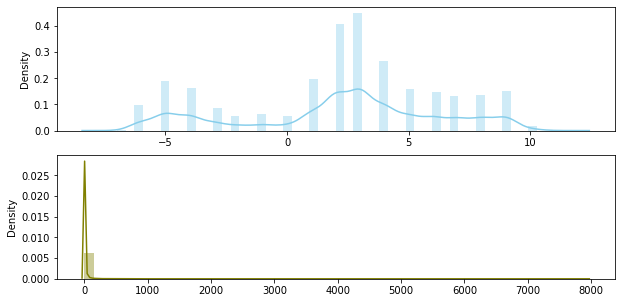

In [223]:
f, axes = plt.subplots(2, 1, figsize=(10, 5))
sns.distplot(PredsLabelsA, color="skyblue", ax=axes[0])
sns.distplot(testA, color="olive", ax=axes[1])